In [1]:
import pandas as pd
import nltk
import re
import h2o
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
tmp_df = pd.read_csv('D:/marco/vr_chat-master/Marco/train_yn.csv')

In [3]:
tmp_df.head()

,passages,query,query_id,query_type,answers_yn
0,"[Row(is_selected=0, passage_text=u'In his youn...",was ronald reagan a democrat,19700,description,Yes
1,"[Row(is_selected=0, passage_text=u'So, in the ...",do game shows pay their contestants,19749,description,Yes
2,"[Row(is_selected=0, passage_text=u'Even though...",does peanut butter contain cholesterol,19761,description,No
3,"[Row(is_selected=0, passage_text=u'When turnin...",can you take left hand lane to turn right on a...,19762,description,No
4,"[Row(is_selected=0, passage_text=u'Assault on ...",is armed assault a felony,19774,description,Yes


In [4]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))


In [5]:
def tf_cln(sent = tmp_df.iloc[0][0],cln=True):

    # sent = tmp_df.iloc[0][0]
    if(cln==True):
        slt_sent = re.findall(r'passage_text(.*?)url',sent)
#         print slt_sent
    else:
        slt_sent = sent
        
    token = nltk.word_tokenize(str(slt_sent))
    filtered_sentence = [w for w in token if not w in stop_words]
#     print filtered_sentence

    for i in filtered_sentence:
        if re.findall(r'^\W.*',str(i)):
    #         print re.findall(r'^\W',i)
            stop_words.add(i)
        
#     for i in re.findall(r'\W',str(filtered_sentence)):
#         stop_words.add(i)
#         print i

    stop_words.add('``')
    filtered_sentence = [w for w in token if not w in stop_words]

    tf = nltk.FreqDist(filtered_sentence)
    
    return dict(tf)

In [6]:
lst_tf_cln=[]
for i in tmp_df.iloc[:,0]:
    lst_tf_cln.append(tf_cln(i))

In [7]:
lst_tf_qry = []
for i in tmp_df.iloc[:,1]:
    lst_tf_qry.append(tf_cln(i,False))

In [8]:
tmp_df = tmp_df.replace(tmp_df['query_type'].unique(),range(0,len(tmp_df['query_type'].unique())))
tmp_df['passages'] = lst_tf_cln
tmp_df['query'] = lst_tf_qry
tmp_df = tmp_df.replace(['yes', 'no'], ['Yes', 'No'])
tmp_df = tmp_df.replace(['Yes', 'No'], ['1', '0'])

In [9]:
del(tmp_df['query_id'])

In [10]:
tmp_df.head()

,passages,query,query_type,answers_yn
0,"{u'Wilson': 1, u'United': 2, u'switched': 1, u...","{u'ronald': 1, u'reagan': 1, u'democrat': 1}",0,1
1,"{u'United': 1, u'show': 18, u'money': 6, u'Jeo...","{u'pay': 1, u'game': 1, u'shows': 1, u'contest...",0,1
2,"{u'serving': 1, u'saturated': 2, u'unhealthy':...","{u'butter': 1, u'peanut': 1, u'contain': 1, u'...",0,0
3,"{u'already': 2, u'show': 2, u'When': 5, u'mark...","{u'lane': 1, u'right': 1, u'carriageway': 1, u...",0,0
4,"{u'sentence': 1, u'Deadly': 1, u'rob': 1, u'mi...","{u'felony': 1, u'assault': 1, u'armed': 1}",0,1


In [97]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,36 secs
H2O cluster version:,3.10.0.10
H2O cluster version age:,2 months and 4 days
H2O cluster name:,H2O_from_python_user_ggfe0u
H2O cluster total nodes:,1
H2O cluster free memory:,896 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [99]:
# hdf=h2o.H2OFrame(tmp_df)

hdf_tf=h2o.H2OFrame(tmp_df[tmp_df.columns[0:3]])
hdf_target = h2o.H2OFrame(pd.DataFrame(tmp_df.answers_yn))
hdf = h2o.H2OFrame.cbind(hdf_tf,h2o.H2OFrame.asfactor(hdf_target))


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [100]:
# h2o.shutdown()

In [101]:
hdf.head(1)

passages,query,query_type,answers_yn
"{'Wilson': 1, 'United': 2, 'switched': 1, 'votes\\\\u2014the': 1, 'supported': 1, 'years': 2, 'four': 1, 'radio': 1, '1962': 2, 'Ford': 1, '1948': 1, 'voter': 1, 'candidate': 3, 'former': 3, 'Ronald': 9, 'video.duration.momentjs': 1, 'candidates': 1, 'small-town': 1, '8': 1, 'campaigned': 2, 'views': 1, 'Re-Election': 1, 'early': 2, 'party': 3, 'Illinois': 1, 'presidential': 1, 'defected': 1, 'witched': 1, 'Raised': 1, 'Republican': 6, 'Liberal': 1, 'commentator': 1, '51': 1, '50': 1, 'disillusioned': 1, 'either': 1, 'found': 1, '538': 1, 'working-class': 1, 'From': 1, 'people': 1, 'Gerald': 1, 'Wikipedia': 1, '1960s': 2, 'challenger': 1, 'economic': 1, 'election': 2, 'Listen': 1, 'even': 1, 'ultimately': 1, 'said': 1, 'fundamentally': 1, 'electoral': 1, 'conservative': 2, '525': 1, 'mate': 2, 'During': 1, 'America': 1, 'ever': 1, 'Mondale': 3, 'He': 2, 'U.S.': 5, 'Bill': 1, 'however': 1, 'free': 1, 'Democrat': 3, 'Ferraro': 2, 'Northerner': 1, 'served': 3, 'put': 1, 'path': 1, '1935-': 2, 'Nixon': 1, 'received': 1, 'Jimmy': 1, 'Clinton': 1, 'carried': 1, 'country': 1, 'changed': 2, 'became': 3, '1970s': 1, 'Yes': 2, 'think': 1, 'first': 2, 'major': 2, 'useful': 1, 'political': 3, 'When': 1, 'number': 2, 'officially': 1, 'female': 2, 'parties': 1, 'old': 1, 'Hollywood': 1, '1984': 4, '1980': 2, '1981': 2, 'trajectory': 1, 'support': 1, 'June': 1, '1989': 2, 'California': 3, 'way': 2, 'vice-presidential': 2, 'white': 1, '40th': 2, 'life': 1, 're-elected': 1, '6': 1, 'American': 2, 'dramatic': 1, 'Harry': 1, '1911': 1, 'Democratic': 6, 'November': 3, 'Carter': 1, 'grew': 1, 'politician': 1, 'presidency': 1, 'reelected': 2, 'Reagan': 15, 'elections': 1, 'governor': 3, 'recording': 1, 'time': 1, 'landslide': 3, 'age': 1, '20s': 1, 'Richard': 1, 'voters': 1, 'states': 1, 'ready': 1, 'Party': 5, 'sounding': 1, 'Walter': 3, 'States': 2, 'different': 2, 'traditionally': 1, 'us': 1, '49': 1, 'rather': 1, 'began': 1, '1967': 1, 'actor': 3, 'member': 2, '5': 1, 'largest': 1, 'President': 2, 'A': 1, 'February': 1, 'I': 1, 'Geraldine': 2, 'earlier': 1, 'running': 2, 'president': 1, 'Democrat\\': 1, 'desert': 1, 'younger': 1, 'Truman': 1, 'especially': 1, '1975': 1, 'later': 1, 'defeating': 3, 'deserted': 1, 'encyclopedia': 1, 'Democrats': 1, '2004': 1, 'In': 4, 'Duration': 1, 'audio': 1, '1911-2004': 1}","{'ronald': 1, 'reagan': 1, 'democrat': 1}",0,1


In [102]:
hdf_train, hdf_validate=hdf.split_frame(ratios=[0.75], seed =5010)

In [103]:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [ ]:
nb =H2ONaiveBayesEstimator(seed =1)
nb.train(x = ['query','query_type','passages'], y = 'answers_yn', training_frame=hdf_train, validation_frame=hdf_validate)

In [ ]:
nb.auc()

In [116]:
gbm_model = H2OGradientBoostingEstimator(seed =1,  ntrees = 170, learn_rate = .05)
gbm_model.train(x = ['query','query_type','passages'], y = 'answers_yn', training_frame=hdf_train, validation_frame=hdf_validate)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


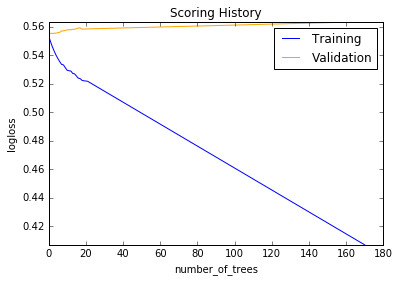

In [117]:
gbm_model.plot()

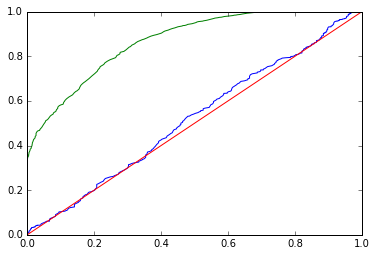

In [118]:
roc_valid = gbm_model.roc(valid=True)
roc_train= gbm_model.roc()

plt.plot(roc_valid[0],roc_valid[1])
plt.plot(roc_train[0],roc_train[1])
plt.plot(np.arange(0.0,1.1,0.1),np.arange(0.0,1.1,0.1))

In [136]:
dl = H2ODeepLearningEstimator(seed =1,epochs =15,hidden=[20,20], model_id='dl1')
dl.train(x = ['query','query_type','passages'], y = 'answers_yn', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


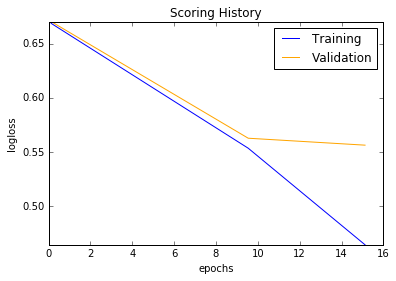

In [137]:
dl.plot()

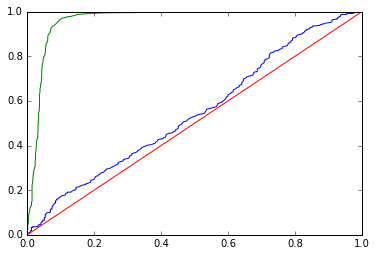

In [138]:
roc_valid = dl.roc(valid=True)
roc_train= dl.roc()

plt.plot(roc_valid[0],roc_valid[1])
plt.plot(roc_train[0],roc_train[1])
plt.plot(np.arange(0.0,1.1,0.1),np.arange(0.0,1.1,0.1))

Reterieve best result

dl = H2ODeepLearningEstimator(seed =1,epochs =10,hidden=[20,20], model_id='dl1')

In [132]:
prediction = dl.predict(hdf_validate[['query','query_type','passages']])
pdf_pred=prediction.as_data_frame()

H2OResponseError: Server error water.exceptions.H2OKeyNotFoundArgumentException:
  Error: Object 'dl1' not found in function: predict for argument: model
  Request: POST /4/Predictions/models/dl1/frames/py_23_sid_9d1e
